In [1]:
!wget https://rakamin-lms.s3.ap-southeast-1.amazonaws.com/vix-assets/home-credit-indonesia/home-credit-default-risk.zip

--2022-08-23 09:16:42--  https://rakamin-lms.s3.ap-southeast-1.amazonaws.com/vix-assets/home-credit-indonesia/home-credit-default-risk.zip
Resolving rakamin-lms.s3.ap-southeast-1.amazonaws.com (rakamin-lms.s3.ap-southeast-1.amazonaws.com)... 52.219.40.159
Connecting to rakamin-lms.s3.ap-southeast-1.amazonaws.com (rakamin-lms.s3.ap-southeast-1.amazonaws.com)|52.219.40.159|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 721616255 (688M) [application/zip]
Saving to: ‘home-credit-default-risk.zip’

home-credit-default 100%[===================>] 688.19M  62.2MB/s    in 12s     

2022-08-23 09:16:54 (59.2 MB/s) - ‘home-credit-default-risk.zip’ saved [721616255/721616255]



In [2]:
!unzip home-credit-default-risk.zip



Archive:  home-credit-default-risk.zip
  inflating: HomeCredit_columns_description.csv  
  inflating: POS_CASH_balance.csv    
  inflating: application_test.csv    
  inflating: application_train.csv   
  inflating: bureau.csv              
  inflating: bureau_balance.csv      
  inflating: credit_card_balance.csv  
  inflating: installments_payments.csv  
  inflating: previous_application.csv  
  inflating: sample_submission.csv   


In [3]:
# import lib
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



In [7]:
# import csc
!pip install PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# autentikasi dan membuat pydrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive= GoogleDrive(gauth)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
link = 'https://drive.google.com/open?id=1rGe9yTqiNBjZiGqLO9rBGbGDKMlG58bn'
fluff, id = link.split('=')

In [9]:
downloaded =  drive.CreateFile({'id': id})
downloaded.GetContentFile('Filename.csv')
df =  pd.read_csv('Filename.csv')

In [10]:
df


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# Cleaning data
# remove duplicate data

# sorting 
df.sort_values('SK_ID_CURR', inplace = True)

# droping
df.drop_duplicates(subset = 'SK_ID_CURR', keep = False, inplace = True)
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
target0 = df.loc[df["TARGET"]==0]
target1 = df.loc[df["TARGET"]==1]
print(len(target0))
print(len(target1))

282686
24825


In [16]:
# listing the null values columns having more than 30%
emptycol=df.isnull().sum()
emptycol=emptycol[emptycol.values>(0.3*len(emptycol))]
len(emptycol)

emptycol = list(emptycol[emptycol.values>=0.3].index)
df.drop(labels=emptycol,axis=1,inplace=True)
print(len(emptycol))

64


In [17]:
df.shape

(307511, 58)

In [18]:
# Checking the columns having less null percentage
df.isnull().sum()/len(df)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000
FLAG_PHONE                     0.000000
FLAG_EMAIL                     0.000000


In [19]:
# Filling missing values with median
values=df['AMT_ANNUITY'].median()
df.loc[df['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=values

In [20]:
# Removing rows having null values greater than or equal to 30%
emptyrow=df.isnull().sum(axis=1)
emptyrow=list(emptyrow[emptyrow.values>=0.3*len(df)].index)
df.drop(labels=emptyrow,axis=0,inplace=True)
print(len(emptyrow))

0


In [21]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,0,0,0,0,0,0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,0,0,0,0,0,0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,0,0,0,0,0,0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,0,0,0,0,0,0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,0,0,0,0,0,0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,0,0,0,0,0,0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
df.isna().values.any()

False

In [24]:
cat_columns = df.select_dtypes(['object']).columns.values.tolist()
cat_columns

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [25]:
for col in cat_columns:
    df[col] = df[col].astype('category')

In [26]:
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,1,0,0,0,157500.0,254700.0,27558.0,...,0,0,0,0,0,0,0,0,0,0
307507,456252,0,0,0,0,1,0,72000.0,269550.0,12001.5,...,0,0,0,0,0,0,0,0,0,0
307508,456253,0,0,0,0,1,0,153000.0,677664.0,29979.0,...,0,0,0,0,0,0,0,0,0,0
307509,456254,1,0,0,0,1,0,171000.0,370107.0,20205.0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
df.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE                int8
CODE_GENDER                       int8
FLAG_OWN_CAR                      int8
FLAG_OWN_REALTY                   int8
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
NAME_INCOME_TYPE                  int8
NAME_EDUCATION_TYPE               int8
NAME_FAMILY_STATUS                int8
NAME_HOUSING_TYPE                 int8
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE                       int64
FLAG_EMAIL                       int64
CNT_FAM_MEMBERS          

In [28]:
columns = df.iloc[:,2:122].select_dtypes(exclude=['int8']).columns.values.tolist()
columns

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [29]:
X = df.iloc[:,2:122]
# numerical features
num_cols = columns
# apply standardization on numerical features
for i in num_cols:
  # fit on training data column
  scale = StandardScaler().fit(X[[i]])
  # transform the training data column
  X[i] = scale.transform(X[[i]])
X

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,0,1,0,1,-0.577538,0.142129,-0.478095,-0.166143,7,4,...,-0.00255,-0.059477,-0.054269,-0.034802,-0.100138,-0.016332,-0.090534,-0.024402,-0.022529,-0.018305
1,0,0,0,0,-0.577538,0.426792,1.725450,0.592683,4,1,...,-0.00255,-0.059477,-0.054269,-0.034802,-0.100138,-0.016332,-0.090534,-0.024402,-0.022529,-0.018305
2,1,1,1,1,-0.577538,-0.427196,-1.152888,-1.404669,7,4,...,-0.00255,-0.059477,-0.054269,-0.034802,-0.100138,-0.016332,-0.090534,-0.024402,-0.022529,-0.018305
3,0,0,0,1,-0.577538,-0.142533,-0.711430,0.177874,7,4,...,-0.00255,-0.059477,-0.054269,-0.034802,-0.100138,-0.016332,-0.090534,-0.024402,-0.022529,-0.018305
4,0,1,0,1,-0.577538,-0.199466,-0.213734,-0.361749,7,4,...,-0.00255,-0.059477,-0.054269,-0.034802,-0.100138,-0.016332,-0.090534,-0.024402,-0.022529,-0.018305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,1,0,0,-0.577538,-0.047646,-0.855489,0.031015,7,4,...,-0.00255,-0.059477,-0.054269,-0.034802,-0.100138,-0.016332,-0.090534,-0.024402,-0.022529,-0.018305
307507,0,0,0,1,-0.577538,-0.408219,-0.818594,-1.042333,3,4,...,-0.00255,-0.059477,-0.054269,-0.034802,-0.100138,-0.016332,-0.090534,-0.024402,-0.022529,-0.018305
307508,0,0,0,1,-0.577538,-0.066623,0.195379,0.198056,7,1,...,-0.00255,-0.059477,-0.054269,-0.034802,-0.100138,-0.016332,-0.090534,-0.024402,-0.022529,-0.018305
307509,0,0,0,1,-0.577538,0.009287,-0.568757,-0.476318,1,4,...,-0.00255,-0.059477,-0.054269,-0.034802,-0.100138,-0.016332,-0.090534,-0.024402,-0.022529,-0.018305


In [30]:
df.describe()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.095213,0.341669,0.340108,0.693673,0.417052,1.687979e+05,5.990260e+05,27108.487841,...,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335
std,102790.175348,0.272419,0.293509,0.474297,0.473746,0.460968,0.722121,2.371231e+05,4.024908e+05,14493.461065,...,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299
min,100002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,367142.500000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,456255.000000,1.000000,1.000000,2.000000,1.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
X.describe()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
count,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,307511.000000,307511.000000,...,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05
mean,0.095213,0.341669,0.340108,0.693673,-3.207148e-17,-1.590866e-17,-4.074788e-17,-1.732969e-17,4.670288,3.188273,...,-5.603267e-19,-8.780377e-18,2.463127e-17,4.898526e-18,-2.952402e-17,3.512151e-18,-3.306505e-17,-7.625064e-18,-1.940925e-18,8.225827e-18
std,0.293509,0.474297,0.473746,0.460968,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,2.544525,1.298753,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,0.000000,0.000000,0.000000,0.000000,-5.775378e-01,-6.036870e-01,-1.376496e+00,-1.758933e+00,0.000000,0.000000,...,-2.550270e-03,-5.947728e-02,-5.426904e-02,-3.480198e-02,-1.001382e-01,-1.633182e-02,-9.053411e-02,-2.440195e-02,-2.252901e-02,-1.830463e-02
25%,0.000000,0.000000,0.000000,0.000000,-5.775378e-01,-2.374210e-01,-8.174760e-01,-7.302952e-01,3.000000,2.000000,...,-2.550270e-03,-5.947728e-02,-5.426904e-02,-3.480198e-02,-1.001382e-01,-1.633182e-02,-9.053411e-02,-2.440195e-02,-2.252901e-02,-1.830463e-02
50%,0.000000,0.000000,0.000000,1.000000,-5.775378e-01,-9.129414e-02,-2.124151e-01,-1.521715e-01,7.000000,4.000000,...,-2.550270e-03,-5.947728e-02,-5.426904e-02,-3.480198e-02,-1.001382e-01,-1.633182e-02,-9.053411e-02,-2.440195e-02,-2.252901e-02,-1.830463e-02
75%,0.000000,1.000000,1.000000,1.000000,8.072731e-01,1.421293e-01,5.208178e-01,5.166140e-01,7.000000,4.000000,...,-2.550270e-03,-5.947728e-02,-5.426904e-02,-3.480198e-02,-1.001382e-01,-1.633182e-02,-9.053411e-02,-2.440195e-02,-2.252901e-02,-1.830463e-02
max,1.000000,2.000000,1.000000,1.000000,2.573387e+01,4.927034e+02,8.574059e+00,1.593252e+01,7.000000,4.000000,...,3.921154e+02,1.681314e+01,1.842671e+01,2.873400e+01,9.986201e+00,6.123017e+01,1.104556e+01,4.098034e+01,4.438721e+01,5.463098e+01


[3.44394622e-03 8.76411155e-03 1.20302689e-02 2.08192836e-02
 2.42697447e-02 6.12914657e-02 6.11103542e-02 6.08231572e-02
 1.58137224e-02 1.58335484e-02 3.30442657e-02 1.90029255e-02
 5.87802996e-02 6.65058180e-02 5.36890665e-02 6.39361012e-02
 6.53731388e-02 1.96772829e-08 1.12109309e-03 1.35775938e-02
 6.11961878e-04 1.46410094e-02 9.56191717e-03 3.02590677e-02
 7.21358473e-03 7.33079850e-03 5.24448955e-02 5.95822181e-02
 1.99087199e-03 4.23839911e-03 3.64090974e-03 5.05067013e-03
 5.16891401e-03 6.08485566e-03 4.76767873e-02 6.31235362e-02
 1.11301900e-04 6.55631488e-03 3.19902524e-06 2.43884332e-03
 2.38161404e-03 6.08952417e-05 3.69607666e-03 8.48685293e-04
 4.46403075e-07 5.91289436e-04 4.69764436e-08 4.63424127e-04
 4.78073140e-04 2.30335772e-04 1.79147384e-03 6.44869736e-05
 1.74356911e-03 2.58935456e-04 2.31654200e-04 1.99012530e-04]


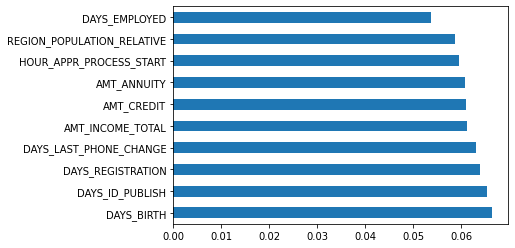

In [32]:
# X independent columns
y = df.iloc[:,1]      #target column
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [33]:
X.shape, y.shape

((307511, 56), (307511,))

In [34]:
feat_importances.nlargest(10)

DAYS_BIRTH                    0.066506
DAYS_ID_PUBLISH               0.065373
DAYS_REGISTRATION             0.063936
DAYS_LAST_PHONE_CHANGE        0.063124
AMT_INCOME_TOTAL              0.061291
AMT_CREDIT                    0.061110
AMT_ANNUITY                   0.060823
HOUR_APPR_PROCESS_START       0.059582
REGION_POPULATION_RELATIVE    0.058780
DAYS_EMPLOYED                 0.053689
dtype: float64

In [35]:
X = X[['DAYS_BIRTH','DAYS_ID_PUBLISH','DAYS_REGISTRATION','DAYS_LAST_PHONE_CHANGE','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY',
       'HOUR_APPR_PROCESS_START','REGION_POPULATION_RELATIVE','DAYS_EMPLOYED']]
X

,DAYS_BIRTH,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,HOUR_APPR_PROCESS_START,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED
0,1.506880,0.579154,0.379837,-0.206987,0.142129,-0.478095,-0.166143,-0.631821,-0.149452,-0.456215
1,-0.166821,1.790855,1.078697,0.163111,0.426792,1.725450,0.592683,-0.325620,-1.252750,-0.460115
2,-0.689509,0.306869,0.206116,0.178834,-0.427196,-1.152888,-1.404669,-0.938022,-0.783451,-0.453299
3,-0.680114,0.369143,-1.375829,0.418310,-0.142533,-0.711430,0.177874,1.511587,-0.928991,-0.473217
4,-0.892535,-0.307263,0.191639,-0.173122,-0.199466,-0.213734,-0.361749,-0.325620,0.563570,-0.473210
...,...,...,...,...,...,...,...,...,...,...
307506,1.537586,0.670578,-0.984955,0.834368,-0.047646,-0.855489,0.031015,0.899185,0.845396,-0.453377
307507,-1.085707,-0.725959,0.169782,1.164554,-0.408219,-0.818594,-1.042333,-1.244224,0.310593,2.133617
307508,0.245417,-1.428203,-0.497002,-1.144328,-0.066623,0.195379,0.198056,-0.938022,-1.147120,-0.507774
307509,0.934008,1.366859,0.688107,0.775104,0.009287,-0.568757,-0.476318,-0.938022,-1.124635,-0.485583


In [36]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Run KnnClassifier
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)

# Calculate the accuracy of the model
#print(knn.score(X_test, y_test))

KNeighborsClassifier(n_neighbors=8)

In [37]:
# Predicting the Test set results
y_pred = knn.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56489
           1       0.09      0.00      0.00      5014

    accuracy                           0.92     61503
   macro avg       0.50      0.50      0.48     61503
weighted avg       0.85      0.92      0.88     61503



In [39]:
cm

array([[56458,    31],
       [ 5011,     3]])

In [40]:
ac

0.9180202591743493

In [41]:
link = 'https://drive.google.com/open?id=1YrrffTTOIbznwPBl45mZ4wOcYKkT0GYD'
fluff, id = link.split('=')

In [42]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Filename.csv')  
df2 = pd.read_csv('Filename.csv')

In [43]:
df2

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [44]:
df2.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,...,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,...,0.001559,0.0,0.0,0.0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,103169.547296,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,0.014428,4325.900393,144348.507136,3552.612035,...,0.039456,0.0,0.0,0.0,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873
min,100001.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,0.000253,-25195.000000,-17463.000000,-23722.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188557.750000,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,0.010006,-19637.000000,-2910.000000,-7459.250000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277549.000000,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,0.018850,-15785.000000,-1293.000000,-4490.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,367555.500000,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,0.028663,-12496.000000,-296.000000,-1901.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,456250.000000,20.000000,4.410000e+06,2.245500e+06,180576.000000,2.245500e+06,0.072508,-7338.000000,365243.000000,0.000000,...,1.000000,0.0,0.0,0.0,2.000000,2.000000,2.000000,6.000000,7.000000,17.000000


In [45]:
df2 = df2[['DAYS_BIRTH','DAYS_ID_PUBLISH','DAYS_REGISTRATION','DAYS_LAST_PHONE_CHANGE','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY',
       'HOUR_APPR_PROCESS_START','REGION_POPULATION_RELATIVE','DAYS_EMPLOYED']]
df2.isna().values.any()

True

In [46]:
df2.fillna(method='ffill', inplace=True)
df2.fillna(method='bfill', inplace=True)
df2.isna().values.any()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


False

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_sc = sc.fit_transform(df2)
df_sc = pd.DataFrame(df_sc)

In [48]:
# Predicting the Test set results
y_pred = knn.predict(df_sc)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [49]:
import collections, numpy
counter = collections.Counter(y_pred)
counter

Counter({0: 48706, 1: 38})

In [50]:
df2.insert(0,'TARGET', y_pred)

In [51]:
# Creating bins for income amount

bins = [0,500000,1000000,1500000,2000000,2500000,3000000,3500000,4000000,4500000,5000000]
slot = ['0-500000','500001-1000000','1000001-1500000', '1500001-2000000','2000001-2500000', '2500001-3000000','3000001-3500000', '3500001-4000000', '4000001-4500000','4500001 and above']
df2['AMT_INCOME_TOTAL'] = pd.cut(df2['AMT_INCOME_TOTAL'],bins,labels=slot)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [52]:
import seaborn as sns
# Count plotting in logarithmic scale
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='magma') 
        
    plt.show()

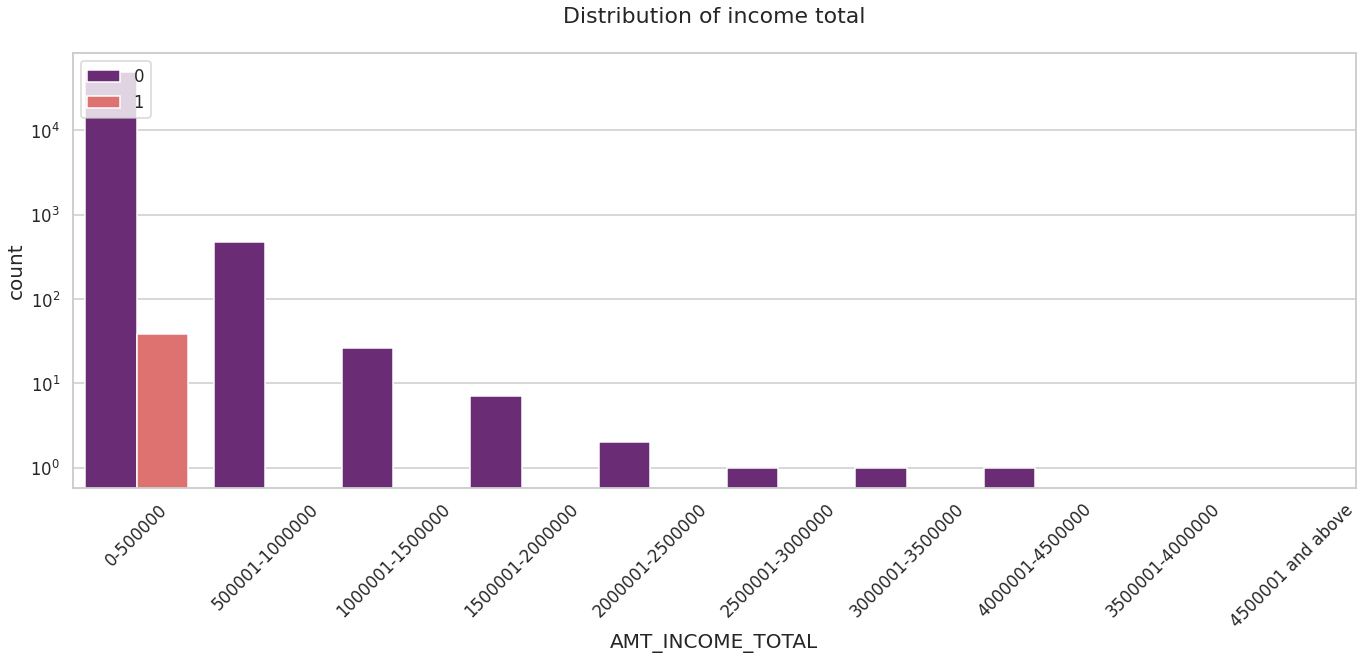

In [53]:
uniplot(df2,col='AMT_INCOME_TOTAL',title='Distribution of income total', hue = y_pred)

In [54]:
age = round(abs(df2.DAYS_BIRTH)/365.25,0)
age.describe()

count    48744.000000
mean        43.985332
std         11.846669
min         20.000000
25%         34.000000
50%         43.000000
75%         54.000000
max         69.000000
Name: DAYS_BIRTH, dtype: float64

In [55]:
df2.insert(0,'AGE', age)

In [56]:
# Creating bins for income amount

bins = [10,20,30,40,50,60,70]
slot = ['10-20','20-30','30-40', '40-50','50-60', '60-above']
df2['AGE'] = pd.cut(df2['AGE'],bins,labels=slot)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


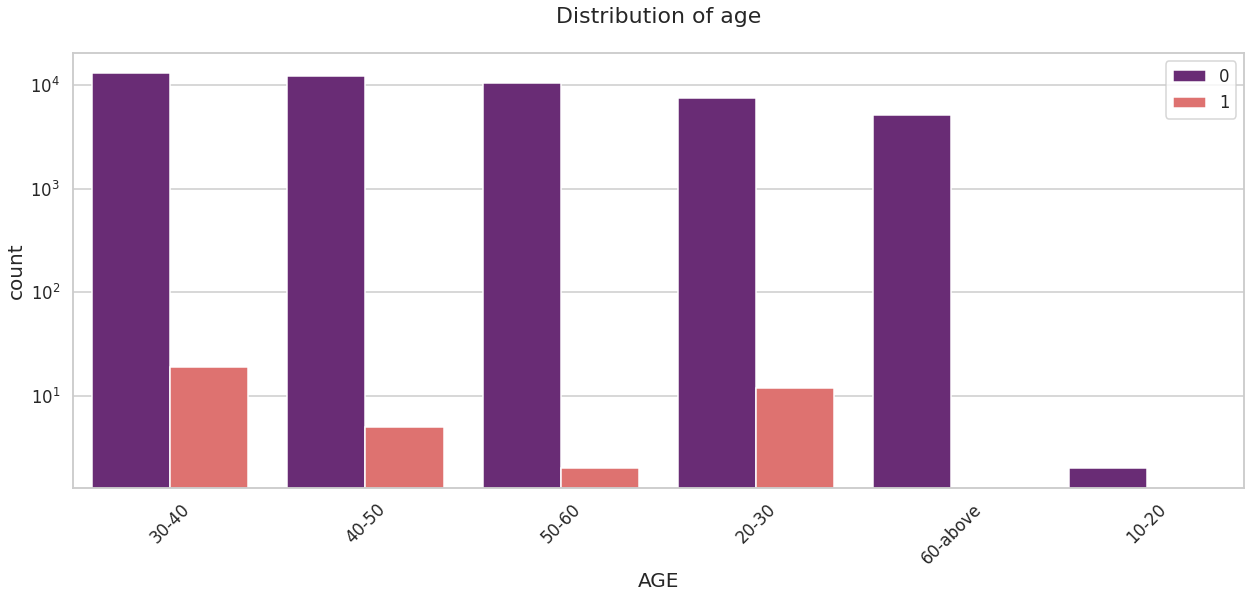

In [57]:
uniplot(df2,col='AGE',title='Distribution of age', hue = y_pred)

In [58]:
# Creating bins for income amount

bins = [0,500000,1000000,1500000,2000000,2500000,3000000,3500000,4000000,4500000,5000000]
slot = ['0-500000','500001-1000000','1000001-1500000', '1500001-2000000','2000001-2500000', '2500001-3000000','3000001-3500000', '3500001-4000000', '4000001-4500000','4500001 and above']
df2['AMT_CREDIT'] = pd.cut(df2['AMT_CREDIT'],bins,labels=slot)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


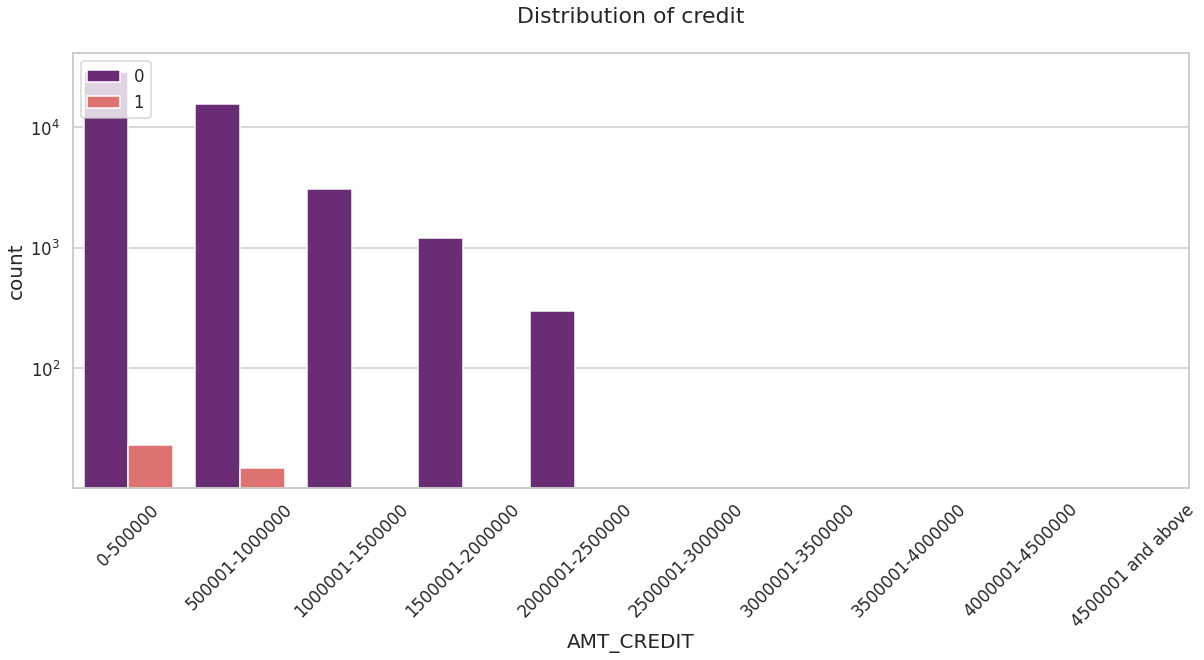

In [59]:

uniplot(df2,col='AMT_CREDIT',title='Distribution of credit', hue = y_pred)